# **1. Perkenalan Dataset**


# **1. Perkenalan Dataset**

### **Deskripsi Dataset**
Dataset yang digunakan dalam proyek ini adalah **Heart Disease Dataset** (sering disebut sebagai Cleveland Database). Dataset ini merupakan kumpulan data klinis yang digunakan untuk memprediksi keberadaan penyakit jantung pada pasien berdasarkan berbagai indikator kesehatan fisik dan hasil tes medis.

Dataset ini terdiri dari:
* **Jumlah Sampel**: 303 baris data pasien.
* **Jumlah Fitur**: 13 fitur prediktor (medis) dan 1 variabel target.
* **Tujuan Proyek**: Membangun model machine learning untuk mengklasifikasikan apakah seorang pasien memiliki penyakit jantung (**Target 1**) atau tidak (**Target 0**).

### **Sumber Dataset**
Dataset diperoleh dari repositori publik yang diakui secara internasional untuk riset kesehatan:
* **Nama Dataset**: Heart Disease Predictions
* **Tautan Sumber**: [Kaggle - Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
* **Referensi Asli**: UCI Machine Learning Repository (Cleveland Clinic Foundation).

### **Informasi Atribut (Kamus Data)**
Berikut adalah penjelasan untuk setiap kolom yang terdapat di dalam dataset `heart.csv`:

| Nama Kolom | Deskripsi |
| :--- | :--- |
| **age** | Usia pasien dalam satuan tahun. |
| **sex** | Jenis kelamin (1 = Laki-laki; 0 = Perempuan). |
| **cp** | *Chest Pain Type* (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic). |
| **trestbps** | Tekanan darah saat istirahat (mm Hg saat masuk rumah sakit). |
| **chol** | Kadar kolesterol serum dalam mg/dl. |
| **fbs** | Gula darah puasa > 120 mg/dl (1 = Benar; 0 = Salah). |
| **restecg** | Hasil elektrokardiografi istirahat (0, 1, 2). |
| **thalach** | Detak jantung maksimum yang dicapai selama tes. |
| **exang** | Angina yang diinduksi oleh latihan (1 = Ya; 0 = Tidak). |
| **oldpeak** | Depresi ST yang diinduksi oleh latihan relatif terhadap istirahat. |
| **slope** | Kemiringan segmen ST latihan puncak. |
| **ca** | Jumlah pembuluh darah utama (0-3) yang diwarnai dengan fluoroskopi. |
| **thal** | Jenis talasemia (1 = Normal; 2 = Fixed Defect; 3 = Reversable Defect). |
| **target** | Diagnosis penyakit jantung (1 = Positif; 0 = Negatif). |

---

# **2. Import Library**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Preprocessing di langkah selanjutnya
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

In [2]:
# Tentukan path relatif ke dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis.

Bentuk Dataset (Baris, Kolom): (918, 12)

Nilai Unik pada Kolom 'HeartDisease':
HeartDisease
1    508
0    410
Name: count, dtype: int64


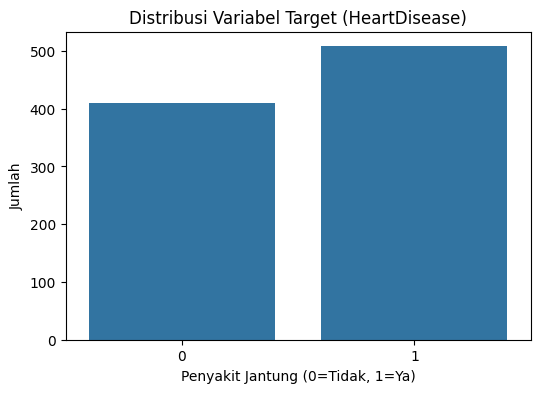

In [3]:
## 4. Exploratory Data Analysis (EDA)

# 4.1. Cek Bentuk Data
print(f"Bentuk Dataset (Baris, Kolom): {df.shape}")

# 4.2. Cek Nilai Unik pada Kolom Target
target_column = 'HeartDisease'
print(f"\nNilai Unik pada Kolom '{target_column}':")
print(df[target_column].value_counts())

# 4.3. Visualisasi Distribusi Variabel Target
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df)
plt.title(f'Distribusi Variabel Target ({target_column})')
plt.xlabel('Penyakit Jantung (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah')
plt.show()



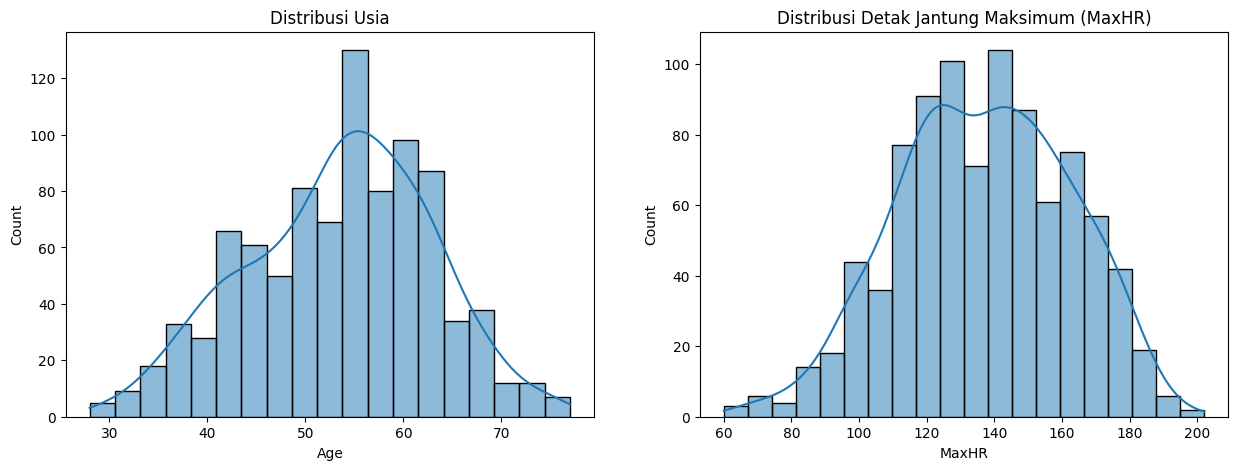

In [4]:
# 4.4. Visualisasi Distribusi Fitur Numerik Penting (Contoh: Usia dan Detak Jantung Maksimum)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Usia')
plt.subplot(1, 2, 2)
sns.histplot(df['MaxHR'], kde=True)
plt.title('Distribusi Detak Jantung Maksimum (MaxHR)')
plt.show()



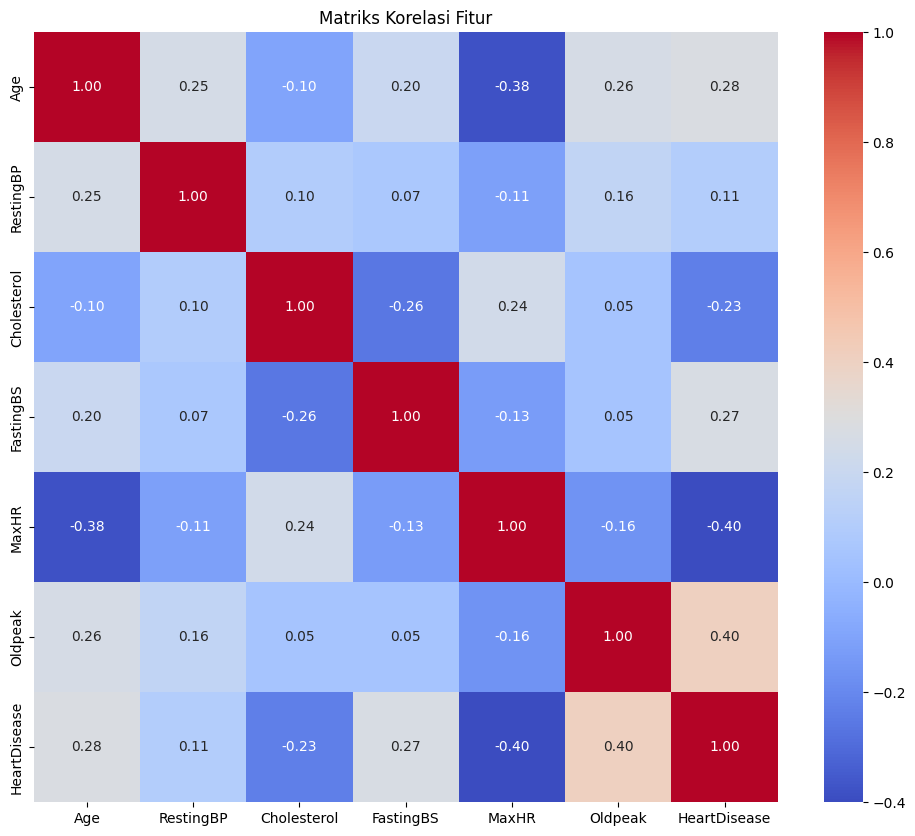

In [5]:
# 4.5. Matriks Korelasi (Untuk melihat hubungan antar fitur)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi Fitur')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.
Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [6]:
missing_data = df.isnull().sum()
print("\n[1] Check Missing Values:\n", missing_data[missing_data > 0])
df = df.dropna()


[1] Check Missing Values:
 Series([], dtype: int64)


In [7]:
duplicate_count = df.duplicated().sum()
print(f"\n[2] Memeriksa Duplikat: {duplicate_count} ditemukan")
df = df.drop_duplicates()


[2] Memeriksa Duplikat: 0 ditemukan


In [8]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Melakukan clipping (mengganti nilai di luar batas dengan nilai batas)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

    df = handle_outliers(df, 'RestingBP')
df = handle_outliers(df, 'Cholesterol')
print("\n[3] Penanganan Outlier selesai (menggunakan metode IQR Clipping).")


[3] Penanganan Outlier selesai (menggunakan metode IQR Clipping).


In [9]:
scaler = StandardScaler()
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\n[4] Standarisasi fitur numerik selesai.")


[4] Standarisasi fitur numerik selesai.


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print("\n[5] Encoding data kategorikal selesai.")


[5] Encoding data kategorikal selesai.


In [11]:
df_raw = pd.read_csv('heart.csv') # Ambil kolom asli untuk binning
df['Age_Category'] = pd.cut(df_raw['Age'], bins=[0, 35, 55, 100], labels=[0, 1, 2]) # 0:Young, 1:Middle, 2:Senior
print("\n[6] Binning pada kolom Age selesai (Kategori: 0, 1, 2).")


[6] Binning pada kolom Age selesai (Kategori: 0, 1, 2).


In [12]:
print("\n--- Preprocessing Selesai ---")
print(f"Ukuran data akhir: {df.shape}")
print(df.head())


--- Preprocessing Selesai ---
Ukuran data akhir: (918, 13)
        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140    1              1   0.410909     0.886771          0   
1 -0.478484    0              2   1.491752    -0.250184          0   
2 -1.751359    1              1  -0.129513     0.824187          0   
3 -0.584556    0              0   0.302825     0.104463          0   
4  0.051881    1              2   0.951331    -0.093722          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  \
0           1  1.382928               0 -0.832432         2             0   
1           1  0.754157               0  0.105664         1             1   
2           2 -1.525138               0 -0.832432         2             0   
3           1 -1.132156               1  0.574711         1             1   
4           1 -0.581981               0 -0.832432         2             0   

  Age_Category  
0            1  
1            1  
2    

In [13]:
df.to_csv('heart_preprocessed.csv', index=False)